In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
data = pd.read_csv("resources/Classified Data", index_col=0)

In [3]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Scaling the data

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scalar = MinMaxScaler()

In [6]:
scaled_features = scalar.fit_transform(data.drop("TARGET CLASS", axis = 1))

In [7]:
scaled_features

array([[0.4779121 , 0.51759273, 0.25584607, ..., 0.23171931, 0.33821385,
        0.47176676],
       [0.29806768, 0.40386405, 0.23483597, ..., 0.48054997, 0.16862214,
        0.68009105],
       [0.3534701 , 0.54590434, 0.48399637, ..., 0.57539686, 0.38981083,
        0.51496952],
       ...,
       [0.62109238, 0.3885955 , 0.39372412, ..., 0.06064075, 0.36436871,
        0.59462402],
       [0.58840762, 0.30191296, 0.15223219, ..., 0.51271266, 0.59998625,
        0.43720711],
       [0.42850058, 0.37331294, 0.15857854, ..., 0.40949472, 0.58665816,
        0.57814674]])

In [8]:
new_features = pd.DataFrame(scaled_features, columns= data.columns[:-1])

In [9]:
new_features

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463
...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207


## Preparing data for training

In [10]:
X = new_features
y = data["TARGET CLASS"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creating model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model = KNeighborsClassifier(n_neighbors= 1)

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

## Metrics

In [18]:
from sklearn.metrics import explained_variance_score, classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, predictions))

[[146   9]
 [ 12 163]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       155
           1       0.95      0.93      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [21]:
explained_variance_score(y_test, predictions)

0.7448479262672811

### Attempting  to improve  with elbow method

In [22]:
error_rate = []
for i in range(1,40):
    mod = KNeighborsClassifier(n_neighbors=i)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

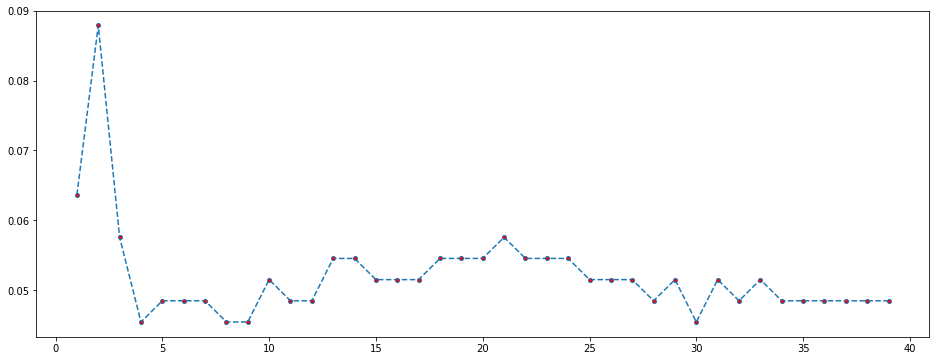

In [23]:
plt.figure(figsize = (16,6))
plt.plot(range(1,40), error_rate, marker = "o",ls = "--", ms = 4, mfc = "r")

### looks like there is a lower error rate at 4,8,9, and 30 for a K value
-- lets test this below - will aim for 30

In [24]:
 mody = KNeighborsClassifier(n_neighbors=30)

In [25]:
mody.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [26]:
elbow_predictions = mody.predict(X_test)

In [27]:
print(classification_report(y_test, elbow_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.97      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [28]:
print(confusion_matrix(y_test,elbow_predictions))

[[149   6]
 [  9 166]]
